# The building blocks of DL 1: SGD

Deep learning is so simple, it is hard to believe, judging by how much magical it seems at first. But it is at it's core a simple piece of code that allows, on each step, be just a bit closer to the solution.

![](https://en.wikipedia.org/wiki/File:Gradient_descent.svg "Credit: https://en.wikipedia.org/wiki/Gradient_descent")

A bit of terminology:

- step
- gradient


In [1]:
import torch

### Basic example: SGD for quadratic function

In [33]:
import numpy as np
def plot_function(ax, f, x_min=-5, x_max=5):
    X = np.arange(x_min, x_max, 0.1)
    Y = [f(x) for x in X]

    ax.plot(X, Y, 'r')

In [55]:
def f(x):
    return x**2 + 4

lr = 0.3

In [57]:
x = torch.tensor(3.).requires_grad_()

In [58]:
def step(x, f):
    y = f(x)

    y.backward()

    x.grad

    x.data = x - lr * x.grad

    x.grad = None
    
    return x

In [59]:
xypairs = []
for i in range(10):
    xypairs.append([x.data, f(x)])
    print(f"f({x}) = {f(x)}")
    x = step(x, f)

f(3.0) = 13.0
f(1.1999999284744263) = 5.439999580383301
f(0.47999995946884155) = 4.230400085449219
f(0.19199997186660767) = 4.036863803863525
f(0.07679998129606247) = 4.005898475646973
f(0.030719991773366928) = 4.000943660736084
f(0.012287996709346771) = 4.00015115737915
f(0.004915198311209679) = 4.000024318695068
f(0.001966079231351614) = 4.000003814697266
f(0.0007864315994083881) = 4.000000476837158


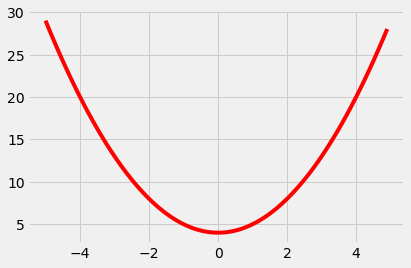

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style

style.use('fivethirtyeight')

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    xs = []
    ys =[]
    for x, y in xypairs[:i]:
        xs.append(float(x))
        ys.append(float(y))
    
    ax1.clear()
    plot_function(ax1, f)
    ax1.plot(xs, ys, 'bo')
    
ani = animation.FuncAnimation(fig, animate, interval=1000)
HTML(ani.to_jshtml())

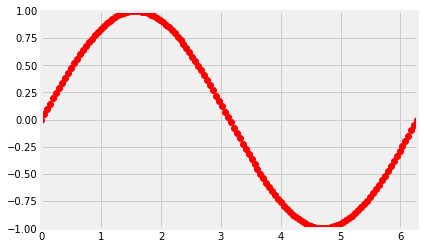

In [50]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
HTML(ani.to_jshtml())

### A single layer example for MedicalNIST 2 categories

It is not a deep learning network yet. Because it doesn't have non-linearity, it cannot be considered to meet requirements of [universal approximation theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem). We'll introduce non-linearity in the next step though :)

### A 2 layer example with non-linearity in between - Simples Deep Network